In [1]:
import bmi.wrapper
import pathlib
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib.collections
import json
import cv2

import sandbox_fm.plots
import sandbox_fm.depth
import sandbox_fm.sandbox_fm
import sandbox_fm.calibrate
%matplotlib inline

No kinect found, using test images


Error: Can't open device. 1.) is it plugged in? 2.) Read the README


In [2]:
with open('../config.json') as f:
    config = json.load(f)
with open('../calibration.json') as f:
    calibration = json.load(f)

In [3]:
model = bmi.wrapper.BMIWrapper('dflowfm')
path = pathlib.Path('../tests/FM_zandbak_update_PV_v1/zm_v2.mdu')
# make sure to pass absolute path
model.initialize(str(path.absolute()))

In [4]:
data = {}
sandbox_fm.sandbox_fm.update_delft3d_initial_vars(data, model)
model_bbox = matplotlib.path.Path(calibration['model_points'])

data['node_in_box'] = model_bbox.contains_points(np.c_[data['xk'], data['yk']])
data['cell_in_box'] = model_bbox.contains_points(np.c_[data['xzw'], data['yzw']])


In [5]:
for i in range(100):
    model.update()
sandbox_fm.sandbox_fm.update_delft3d_vars(data, model)
unorm0 = np.sqrt(data['ucx']**2 + data['ucy']**2)

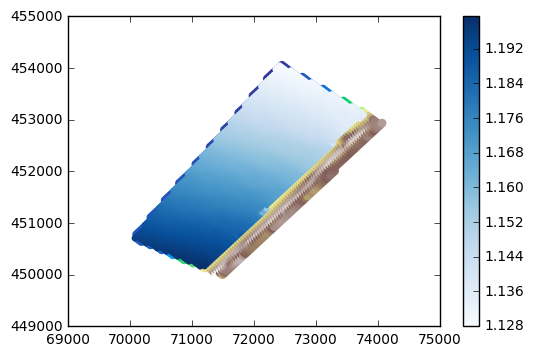

In [6]:
idx = data['node_in_box']
plt.scatter(
    data['xk'][idx], 
    data['yk'][idx], 
    c=data['zk'][idx], 
    edgecolor='none',
    cmap='terrain',
    s=40
)
idx = np.logical_and(data['cell_in_box'], data['is_wet'])
plt.scatter(
    data['xzw'][idx], 
    data['yzw'][idx], 
    c=data['s1'][idx], 
    edgecolor='none',
    cmap='Blues'    
)
plt.colorbar()
# plt.quiver(
#     data['xzw'][idx], data['yzw'][idx], 
#     data['ucx'][idx], data['ucy'][idx],
#     units='xy',
#     scale=0.005
# )

In [21]:
square = matplotlib.path.Path([
        [71000, 451000],
        [72000, 451000],
        [72000, 452000],
        [71000, 452000]
    ])
square_idx = square.contains_points(np.c_[data['xk'], data['yk']])
zk = model.get_var('zk')
zk[square_idx] += 0.3
model.set_var('zk', zk)


xzw = model.get_var('xzw')
yzw = model.get_var('yzw')
bl = model.get_var('bl')
square_idx = np.where(square.contains_points(np.c_[xzw, yzw]))
bl[square_idx] = 0.2
model.set_var('bl', bl)


In [22]:
for i in range(10):
    model.update(60)
sandbox_fm.sandbox_fm.update_delft3d_vars(data, model)


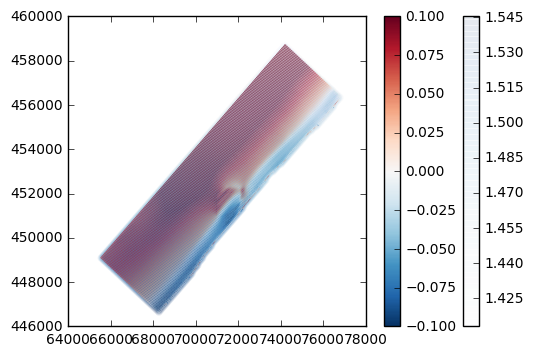

In [23]:
unorm = np.sqrt(data['ucx']**2 + data['ucy']**2)
idx = data['node_in_box']
idx = np.s_[:]
# plt.scatter(
#     data['xk'][idx], 
#     data['yk'][idx], 
#     c=data['zk'][idx], 
#     edgecolor='none',
#     cmap='terrain',
#     s=40
# )
# plt.colorbar()
idx = np.logical_and(data['cell_in_box'], data['is_wet'])
idx = data['is_wet']
plt.scatter(
    data['xzw'][idx], 
    data['yzw'][idx], 
    c=data['s1'][idx], 
    edgecolor='none',
    cmap='Blues',
    alpha=0.05
)
plt.colorbar()
plt.quiver(
    data['xzw'][idx], data['yzw'][idx], 
    data['ucx'][idx], data['ucy'][idx],
    (unorm - unorm0)[idx],
    units='xy',
    scale=0.01,
    cmap=matplotlib.cm.RdBu_r,
    clim=(-0.1, 0.1)
)
plt.colorbar()

In [10]:
data['bl']

array([-11.575    , -11.616875 , -11.64     , ...,  10.39233  ,
        10.39233  ,  12.3897995])

In [11]:
model.get_current_time()

612.0